Imports and input file

In [2]:
import pandas as pd

df = pd.read_csv('BTC-USD_17.09.2014-25.10.2023.csv')

df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')

df['Prev_Open'] = df['Open'].shift(1)
df['Prev_Close'] = df['Close'].shift(1)

### 0: Hold, 1: Buy, -1: Sell ###
df['Signal'] = 0

df.loc[df['Close'] > df['Prev_Close'], 'Signal'] = 1
df.loc[df['Close'] < df['Prev_Close'], 'Signal'] = -1

In [3]:
start_date = input("Enter the start date (dd-mm-yy): ")
end_date = input("Enter the end date (dd-mm-yy): ")

start_date = pd.to_datetime(start_date, dayfirst=True)

start_date_df_ascending_6month = pd.to_datetime('2020-10-01')
end_date_df_ascending_6month  = pd.to_datetime('2021-04-01')
start_date_df_descending_6month = pd.to_datetime('2021-10-01')
end_date_df_descending_6month  = pd.to_datetime('2022-09-01')
start_date_df_stagnation_6month = pd.to_datetime('2015-11-01')
end_date_df_stagnation_6month  = pd.to_datetime('2016-04-01')
start_date_df_combined_1year = pd.to_datetime('2021-10-01')
end_date_df_combined_1year  = pd.to_datetime('2022-10-01')

In [4]:
filtered_df_ascending_6month = df[(df['Date'] >= start_date_df_ascending_6month) & (df['Date'] <= end_date_df_ascending_6month)]
filtered_df_descending_6month = df[(df['Date'] >= start_date_df_descending_6month) & (df['Date'] <= end_date_df_descending_6month)]
filtered_df_stagnation_6month = df[(df['Date'] >= start_date_df_stagnation_6month) & (df['Date'] <= end_date_df_stagnation_6month)]
filtered_df_combined_1year = df[(df['Date'] >= start_date_df_combined_1year) & (df['Date'] <= end_date_df_combined_1year)]
filtered_df = df[(df['Date'] >= start_date) & (df['Date'] <= end_date)]

filtered_df['Position'] = 0
filtered_df_ascending_6month['Position'] = 0
filtered_df_descending_6month['Position'] = 0
filtered_df_stagnation_6month['Position'] = 0
filtered_df_combined_1year['Position'] = 0

C:\Users\Palko\AppData\Local\Temp\ipykernel_10084\3602111431.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Position'] = 0
C:\Users\Palko\AppData\Local\Temp\ipykernel_10084\3602111431.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df_ascending_6month['Position'] = 0
C:\Users\Palko\AppData\Local\Temp\ipykernel_10084\3602111431.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instea

In [5]:
filtered_df_ascending_6month['Prev_Open'] = filtered_df_ascending_6month['Open'].shift(1)
filtered_df_ascending_6month['Prev_Close'] = filtered_df_ascending_6month['Close'].shift(1)

filtered_df_descending_6month['Prev_Open'] = filtered_df_descending_6month['Open'].shift(1)
filtered_df_descending_6month['Prev_Close'] = filtered_df_descending_6month['Close'].shift(1)

filtered_df_stagnation_6month['Prev_Open'] = filtered_df_stagnation_6month['Open'].shift(1)
filtered_df_stagnation_6month['Prev_Close'] = filtered_df_stagnation_6month['Close'].shift(1)

filtered_df_combined_1year['Prev_Open'] = filtered_df_combined_1year['Open'].shift(1)
filtered_df_combined_1year['Prev_Close'] = filtered_df_combined_1year['Close'].shift(1)

### 0: Hold, 1: Buy, -1: Sell ###
filtered_df_ascending_6month['Signal'] = 0
filtered_df_descending_6month['Signal'] = 0
filtered_df_stagnation_6month['Signal'] = 0
filtered_df_combined_1year['Signal'] = 0

filtered_df_ascending_6month.loc[filtered_df_ascending_6month['Close'] > filtered_df_ascending_6month['Prev_Close'], 'Signal'] = 1
filtered_df_ascending_6month.loc[filtered_df_ascending_6month['Close'] < filtered_df_ascending_6month['Prev_Close'], 'Signal'] = -1

filtered_df_descending_6month.loc[filtered_df_descending_6month['Close'] > filtered_df_descending_6month['Prev_Close'], 'Signal'] = 1
filtered_df_descending_6month.loc[filtered_df_descending_6month['Close'] < filtered_df_descending_6month['Prev_Close'], 'Signal'] = -1

filtered_df_stagnation_6month.loc[filtered_df_stagnation_6month['Close'] > filtered_df_stagnation_6month['Prev_Close'], 'Signal'] = 1
filtered_df_stagnation_6month.loc[filtered_df_stagnation_6month['Close'] < filtered_df_stagnation_6month['Prev_Close'], 'Signal'] = -1

filtered_df_combined_1year.loc[filtered_df_combined_1year['Close'] > filtered_df_combined_1year['Prev_Close'], 'Signal'] = 1
filtered_df_combined_1year.loc[filtered_df_combined_1year['Close'] < filtered_df_combined_1year['Prev_Close'], 'Signal'] = -1

filtered_df_ascending_6month.to_csv('trading_bot_2_filtered_output.csv', index=False)
filtered_df_descending_6month.to_csv('trading_bot_2_filtered_output.csv', index=False)
filtered_df_stagnation_6month.to_csv('trading_bot_2_filtered_output.csv', index=False)
filtered_df_combined_1year.to_csv('trading_bot_2_filtered_output.csv', index=False)

C:\Users\Palko\AppData\Local\Temp\ipykernel_10084\8927258.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df_ascending_6month['Prev_Open'] = filtered_df_ascending_6month['Open'].shift(1)
C:\Users\Palko\AppData\Local\Temp\ipykernel_10084\8927258.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df_ascending_6month['Prev_Close'] = filtered_df_ascending_6month['Close'].shift(1)
C:\Users\Palko\AppData\Local\Temp\ipykernel_10084\8927258.py:4: SettingWithCopyWarning: 
A value is trying to 

In [6]:
initial_balance = int(input("Enter the initial balance of trading bot wallet: "))

In [7]:
trade_counter = 0
trades_made = []

def trading_bot_2(balance, data, mode, fee, profit):
    trades = []
    holding = 0
    open_positon_long = False
    open_positon_short = False
    hold_count = 0

    for index, row in data.iterrows():
        date = row['Date']
        open_price = row['Open']
        close_price = row['Close']

        if hold_count >= 7:
            if open_positon_long:
                balance = holding * open_price
                current_profit = balance - initial_balance / initial_balance * 100
            if open_positon_short:
                balance = balance - abs(balance - holding * open_price)
                current_profit = balance - initial_balance / initial_balance * 100
            open_positon_long = False
            open_positon_short = False
            trades.append(['Hold Position Closed', date, open_price, 0, balance, current_profit])
            hold_count = 0

        if open_positon_long:
            if balance == 0:
                trades.append(['You have been liquidated', date, open_price, 0, balance, 0])
                break
            current_profit = (holding * open_price) - initial_balance / initial_balance * 100
            if(current_profit >= profit):
                balance = holding * open_price
                trades.append(['Take Profit Long', date, open_price, holding, balance, current_profit])
                open_positon_long = False
                hold_count = 0
            else:
                hold_count = 1 + hold_count
                trades.append(['Hold Position Long', date, open_price, holding, balance, 0])
        elif open_positon_short:
            if balance == 0:
                trades.append(['You have been liquidated', date, open_price, 0, balance, 0])
                break
            current_profit = (holding * open_price) - initial_balance / initial_balance * 100
            if(-1 * current_profit >= profit):
                balance = balance + (holding * open_price - balance) * -1
                trades.append(['Take Profit Short', date, open_price, holding, balance, current_profit])
                open_positon_short = False
                hold_count = 0
            else:
                hold_count = 1 + hold_count
                trades.append(['Hold Position Short', date, open_price, holding, balance, 0])
        else:
            if row['Signal'] == 1:
                # Buy
                open_positon_long = True
                holding = balance / open_price
                data.at[index, 'Position'] = 1
                trades.append(['Long', date, open_price, holding, balance, 0])
            elif row['Signal'] == -1:
                # Sell
                open_positon_short = True
                data.at[index, 'Position'] = 1
                holding = balance / open_price
                trades.append(['Short', date, open_price, holding, balance, 0])
            else:
                trades.append(['NO SIGNAL', date, open_price, holding, balance, 0])

    final_balance = trades[-1][-2]
    return final_balance, trades

In [8]:
print(f"Initial Balance: ${initial_balance}")

final_balance_asc_tb2, trades = trading_bot_2(initial_balance, filtered_df_ascending_6month, 'ASC',2, 1)
print(f"Final Balance ASC_6M: ${final_balance_asc_tb2}")
trades_df = pd.DataFrame(trades, columns=['Mode', 'Date', 'Price', 'Holding', 'Balance', 'Profit to Initial Balance'])
trades_df.to_csv('tradesASC_bot_2.csv', index=False)

final_balance_dsc_tb2, trades = trading_bot_2(initial_balance, filtered_df_descending_6month, 'DSC',2, 1)
print(f"Final Balance DSC_6M: ${final_balance_dsc_tb2}")
trades_df = pd.DataFrame(trades, columns=['Mode', 'Date', 'Price', 'Holding', 'Balance', 'Profit to Initial Balance'])
trades_df.to_csv('tradesDSC_bot_2.csv', index=False)

final_balance_stg_tb2, trades = trading_bot_2(initial_balance, filtered_df_stagnation_6month, 'STG',2, 1)
print(f"Final Balance STG_6M: ${final_balance_stg_tb2}")
trades_df = pd.DataFrame(trades, columns=['Mode', 'Date', 'Price', 'Holding', 'Balance', 'Profit to Initial Balance'])
trades_df.to_csv('tradesSTG_bot_2.csv', index=False)

final_balance_com_tb2, trades = trading_bot_2(initial_balance, filtered_df_combined_1year, 'COM',2, 1)
print(f"Final Balance COM_1Y: ${final_balance_com_tb2}")
trades_df = pd.DataFrame(trades, columns=['Mode', 'Date', 'Price', 'Holding', 'Balance', 'Profit to Initial Balance'])
trades_df.to_csv('tradesCOM_bot_2.csv', index=False)

Initial Balance: $100
Final Balance ASC_6M: $133.03253295727944
Final Balance DSC_6M: $107.69510899147123
Final Balance STG_6M: $122.85622356264042
Final Balance COM_1Y: $116.20950149623086


In [9]:
df_asc_bot_2 = pd.read_csv('tradesASC_bot_2.csv')
df_dsc_bot_2 = pd.read_csv('tradesDSC_bot_2.csv')
df_stg_bot_2 = pd.read_csv('tradesSTG_bot_2.csv')
df_com_bot_2 = pd.read_csv('tradesCOM_bot_2.csv')

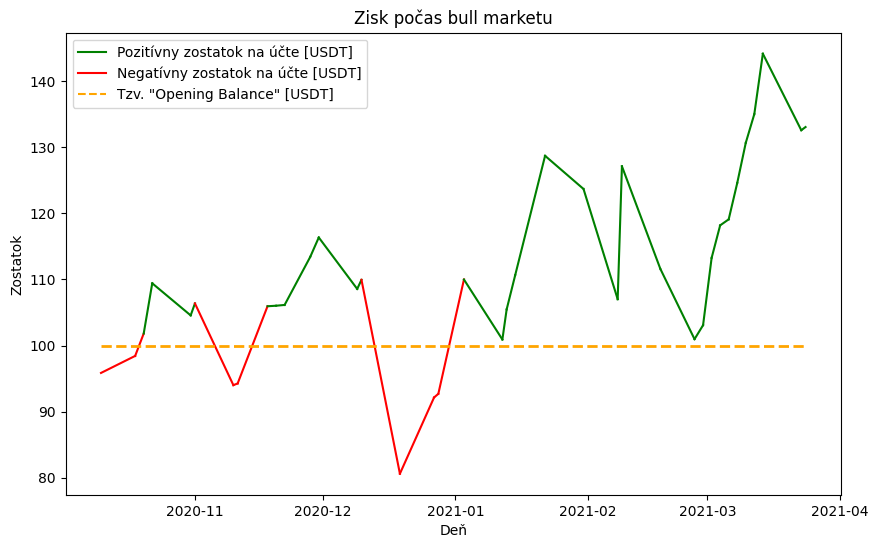

In [26]:
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

df_asc_bot_2_filtered = df_asc_bot_2[df_asc_bot_2['Profit to Initial Balance'] != 0].reset_index(drop=True)

plt.figure(figsize=(10, 6))
for i in range(1, len(df_asc_bot_2_filtered['Date'])):
    if df_asc_bot_2_filtered['Balance'][i-1] >= initial_balance and df_asc_bot_2_filtered['Balance'][i] >= initial_balance:
        plt.plot([pd.to_datetime(df_asc_bot_2_filtered['Date'][i-1]), pd.to_datetime(df_asc_bot_2_filtered['Date'][i])],
                 [df_asc_bot_2_filtered['Balance'][i-1], df_asc_bot_2_filtered['Balance'][i]], color='green')
    else:
        plt.plot([pd.to_datetime(df_asc_bot_2_filtered['Date'][i-1]), pd.to_datetime(df_asc_bot_2_filtered['Date'][i])],
                 [df_asc_bot_2_filtered['Balance'][i-1], df_asc_bot_2_filtered['Balance'][i]], color='red')

plt.plot([pd.to_datetime(df_asc_bot_2_filtered['Date'][0]), pd.to_datetime(df_asc_bot_2_filtered['Date'][len(df_asc_bot_2_filtered['Date'])-1])], [initial_balance, initial_balance], color='orange', linestyle='dashed', linewidth=2, label='Zostatok na účte [USDT]')

legend_elements = [Line2D([0], [0], color='green', label='Pozitívny zostatok na účte [USDT]'),
                   Line2D([0], [0], color='red', label='Negatívny zostatok na účte [USDT]'),
                   Line2D([0], [0], color='orange', linestyle='dashed', label='Tzv. "Opening Balance" [USDT]')]

plt.legend(handles=legend_elements)
plt.title('Zisk počas bull marketu')
plt.xlabel('Deň')
plt.ylabel('Zostatok')
plt.show()

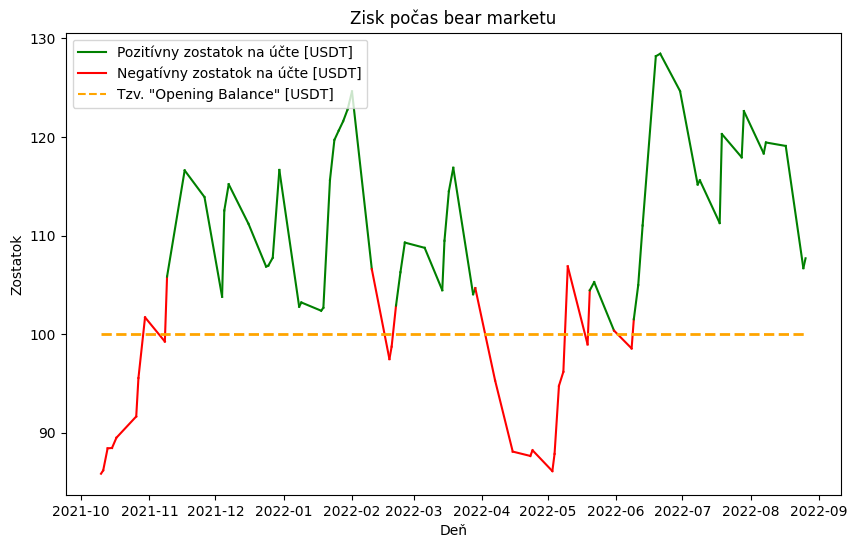

In [27]:
df_dsc_bot_2_filtered = df_dsc_bot_2[df_dsc_bot_2['Profit to Initial Balance'] != 0].reset_index(drop=True)

plt.figure(figsize=(10, 6))
for i in range(1, len(df_dsc_bot_2_filtered['Date'])):
    if df_dsc_bot_2_filtered['Balance'][i-1] >= initial_balance and df_dsc_bot_2_filtered['Balance'][i] >= initial_balance:
        plt.plot([pd.to_datetime(df_dsc_bot_2_filtered['Date'][i-1]), pd.to_datetime(df_dsc_bot_2_filtered['Date'][i])],
                 [df_dsc_bot_2_filtered['Balance'][i-1], df_dsc_bot_2_filtered['Balance'][i]], color='green')
    else:
        plt.plot([pd.to_datetime(df_dsc_bot_2_filtered['Date'][i-1]), pd.to_datetime(df_dsc_bot_2_filtered['Date'][i])],
                 [df_dsc_bot_2_filtered['Balance'][i-1], df_dsc_bot_2_filtered['Balance'][i]], color='red')

plt.plot([pd.to_datetime(df_dsc_bot_2_filtered['Date'][0]), pd.to_datetime(df_dsc_bot_2_filtered['Date'][len(df_dsc_bot_2_filtered['Date'])-1])], [initial_balance, initial_balance], color='orange', linestyle='dashed', linewidth=2, label='Zostatok na účte [USDT]')

legend_elements = [Line2D([0], [0], color='green', label='Pozitívny zostatok na účte [USDT]'),
                   Line2D([0], [0], color='red', label='Negatívny zostatok na účte [USDT]'),
                   Line2D([0], [0], color='orange', linestyle='dashed', label='Tzv. "Opening Balance" [USDT]')]

plt.legend(handles=legend_elements)
plt.title('Zisk počas bear marketu')
plt.xlabel('Deň')
plt.ylabel('Zostatok')

plt.show()

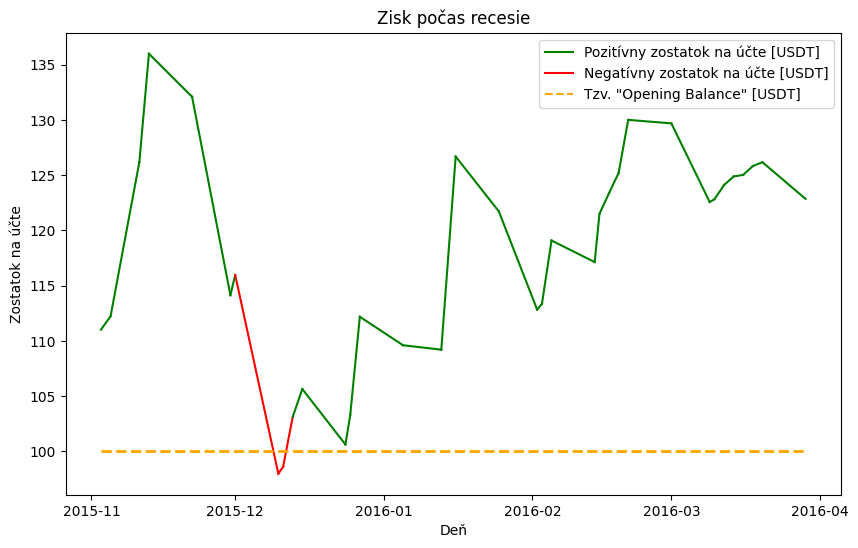

In [30]:
df_stg_bot_2_filtered = df_stg_bot_2[df_stg_bot_2['Profit to Initial Balance'] != 0].reset_index(drop=True)

plt.figure(figsize=(10, 6))
for i in range(1, len(df_stg_bot_2_filtered['Date'])):
    if df_stg_bot_2_filtered['Balance'][i-1] >= initial_balance and df_stg_bot_2_filtered['Balance'][i] >= initial_balance:
        plt.plot([pd.to_datetime(df_stg_bot_2_filtered['Date'][i-1]), pd.to_datetime(df_stg_bot_2_filtered['Date'][i])],
                 [df_stg_bot_2_filtered['Balance'][i-1], df_stg_bot_2_filtered['Balance'][i]], color='green')
    else:
        plt.plot([pd.to_datetime(df_stg_bot_2_filtered['Date'][i-1]), pd.to_datetime(df_stg_bot_2_filtered['Date'][i])],
                 [df_stg_bot_2_filtered['Balance'][i-1], df_stg_bot_2_filtered['Balance'][i]], color='red')

plt.plot([pd.to_datetime(df_stg_bot_2_filtered['Date'][0]), pd.to_datetime(df_stg_bot_2_filtered['Date'][len(df_stg_bot_2_filtered['Date'])-1])], [initial_balance, initial_balance], color='orange', linestyle='dashed', linewidth=2, label='Zostatok na účte [USDT]')

legend_elements = [Line2D([0], [0], color='green', label='Pozitívny zostatok na účte [USDT]'),
                   Line2D([0], [0], color='red', label='Negatívny zostatok na účte [USDT]'),
                   Line2D([0], [0], color='orange', linestyle='dashed', label='Tzv. "Opening Balance" [USDT]')]

plt.legend(handles=legend_elements)
plt.title('Zisk počas recesie')
plt.xlabel('Deň')
plt.ylabel('Zostatok na účte')
plt.show()

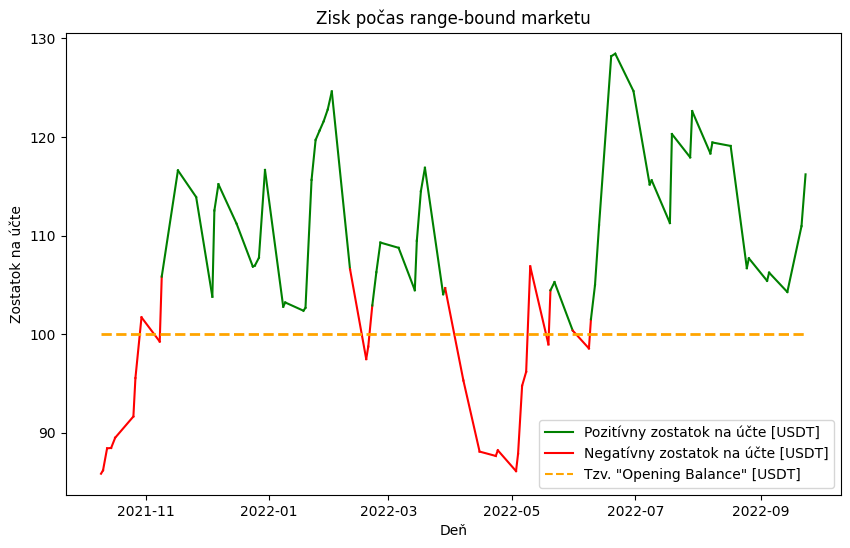

In [31]:
df_com_bot_2_filtered = df_com_bot_2[df_com_bot_2['Profit to Initial Balance'] != 0].reset_index(drop=True)

plt.figure(figsize=(10, 6))
for i in range(1, len(df_com_bot_2_filtered['Date'])):
    if df_com_bot_2_filtered['Balance'][i-1] >= initial_balance and df_com_bot_2_filtered['Balance'][i] >= initial_balance:
        plt.plot([pd.to_datetime(df_com_bot_2_filtered['Date'][i-1]), pd.to_datetime(df_com_bot_2_filtered['Date'][i])],
                 [df_com_bot_2_filtered['Balance'][i-1], df_com_bot_2_filtered['Balance'][i]], color='green')
    else:
        plt.plot([pd.to_datetime(df_com_bot_2_filtered['Date'][i-1]), pd.to_datetime(df_com_bot_2_filtered['Date'][i])],
                 [df_com_bot_2_filtered['Balance'][i-1], df_com_bot_2_filtered['Balance'][i]], color='red')

plt.plot([pd.to_datetime(df_com_bot_2_filtered['Date'][0]), pd.to_datetime(df_com_bot_2_filtered['Date'][len(df_com_bot_2_filtered['Date'])-1])], [initial_balance, initial_balance], color='orange', linestyle='dashed', linewidth=2, label='Zostatok na účte [USDT]')

legend_elements = [Line2D([0], [0], color='green', label='Pozitívny zostatok na účte [USDT]'),
                   Line2D([0], [0], color='red', label='Negatívny zostatok na účte [USDT]'),
                   Line2D([0], [0], color='orange', linestyle='dashed', label='Tzv. "Opening Balance" [USDT]')]

plt.legend(handles=legend_elements)
plt.title('Zisk počas range-bound marketu')
plt.xlabel('Deň')
plt.ylabel('Zostatok na účte')
plt.show()

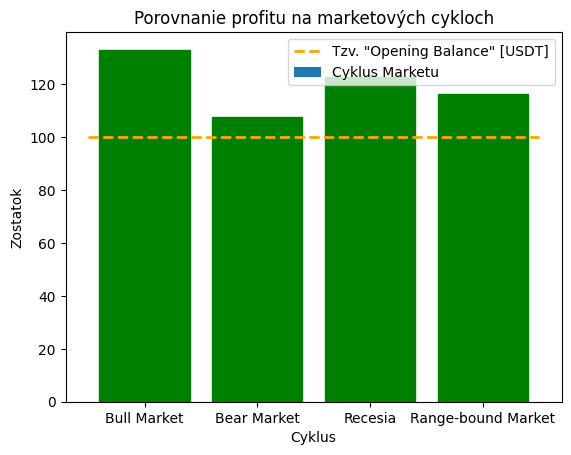

In [34]:
x_pos = ['Bull Market', 'Bear Market', 'Recesia', 'Range-bound Market']
y_pos = [final_balance_asc_tb2, final_balance_dsc_tb2, final_balance_stg_tb2, final_balance_com_tb2]

bars = plt.bar(x_pos,y_pos)
plt.plot([-0.5, len(x_pos)-0.5], [initial_balance, initial_balance], color='orange', linestyle='dashed', linewidth=2)
plt.legend(['Tzv. "Opening Balance" [USDT]', 'Cyklus Marketu'])
plt.title('Porovnanie profitu na marketových cykloch')
plt.xlabel('Cyklus')
plt.ylabel('Zostatok')

for i in range(len(bars)):
    if initial_balance > y_pos[i]:
        bars[i].set_color('red')
    else:
        bars[i].set_color('green')

Mode
Hold Position Short     94
Hold Position Long      24
Long                    21
Take Profit Long        19
Short                   18
Hold Position Closed    13
Take Profit Short        6
NO SIGNAL                1
Name: count, dtype: int64
2


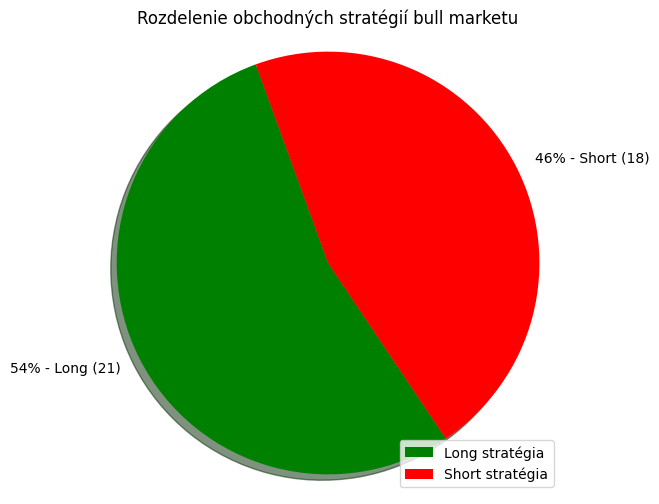

In [49]:
mode_counts = df_asc_bot_2['Mode'].value_counts()
filtered_mode_counts = mode_counts.loc[['Long', 'Short']]

plt.figure(figsize=(10, 6))
labels = [f"{count / filtered_mode_counts.sum() * 100:.0f}% - {mode} ({count})" for mode, count in zip(filtered_mode_counts.index, filtered_mode_counts)]
plt.pie(filtered_mode_counts, labels=labels, autopct='', colors=['green','red'],shadow=True, startangle=110)
plt.legend(['Long stratégia', 'Short stratégia'], loc='lower right')
plt.title('Rozdelenie obchodných stratégií bull marketu')
plt.axis('equal')

plt.show()

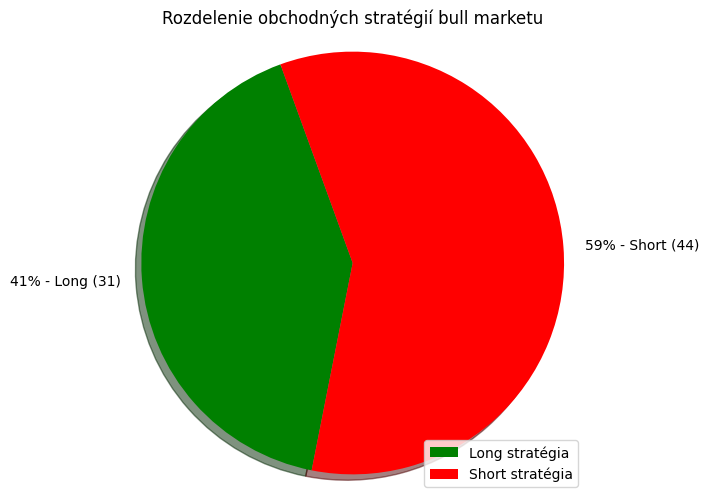

In [50]:
mode_counts = df_dsc_bot_2['Mode'].value_counts()
filtered_mode_counts = mode_counts.loc[['Long', 'Short']]

plt.figure(figsize=(10, 6))
labels = [f"{count / filtered_mode_counts.sum() * 100:.0f}% - {mode} ({count})" for mode, count in zip(filtered_mode_counts.index, filtered_mode_counts)]
plt.pie(filtered_mode_counts, labels=labels, autopct='', colors=['green','red'],shadow=True, startangle=110)
plt.legend(['Long stratégia', 'Short stratégia'], loc='lower right')
plt.title('Rozdelenie obchodných stratégií bear marketu')
plt.axis('equal')

plt.show()

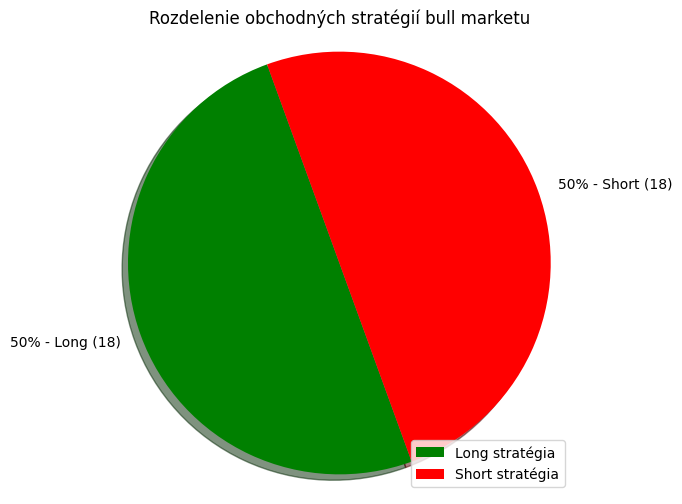

In [51]:
mode_counts = df_stg_bot_2['Mode'].value_counts()
filtered_mode_counts = mode_counts.loc[['Long', 'Short']]

plt.figure(figsize=(10, 6))
labels = [f"{count / filtered_mode_counts.sum() * 100:.0f}% - {mode} ({count})" for mode, count in zip(filtered_mode_counts.index, filtered_mode_counts)]
plt.pie(filtered_mode_counts, labels=labels, autopct='', colors=['green','red'],shadow=True, startangle=110)
plt.legend(['Long stratégia', 'Short stratégia'], loc='lower right')
plt.title('Rozdelenie obchodných stratégií v recesii')
plt.axis('equal')

plt.show()

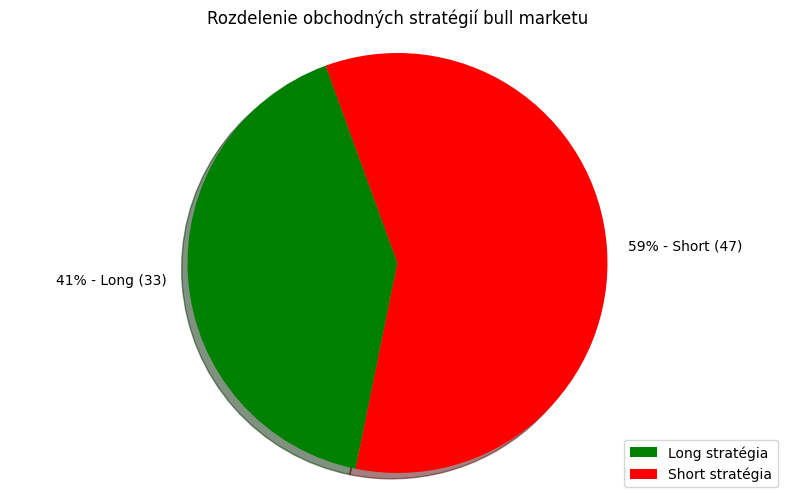

In [53]:
mode_counts = df_com_bot_2['Mode'].value_counts()
filtered_mode_counts = mode_counts.loc[['Long', 'Short']]

plt.figure(figsize=(10, 6))
labels = [f"{count / filtered_mode_counts.sum() * 100:.0f}% - {mode} ({count})" for mode, count in zip(filtered_mode_counts.index, filtered_mode_counts)]
plt.pie(filtered_mode_counts, labels=labels, autopct='', colors=['green','red'],shadow=True, startangle=110)
plt.legend(['Long stratégia', 'Short stratégia'], loc='lower right')
plt.title('Rozdelenie obchodných stratégií v range-bound markete')
plt.axis('equal')

plt.show()

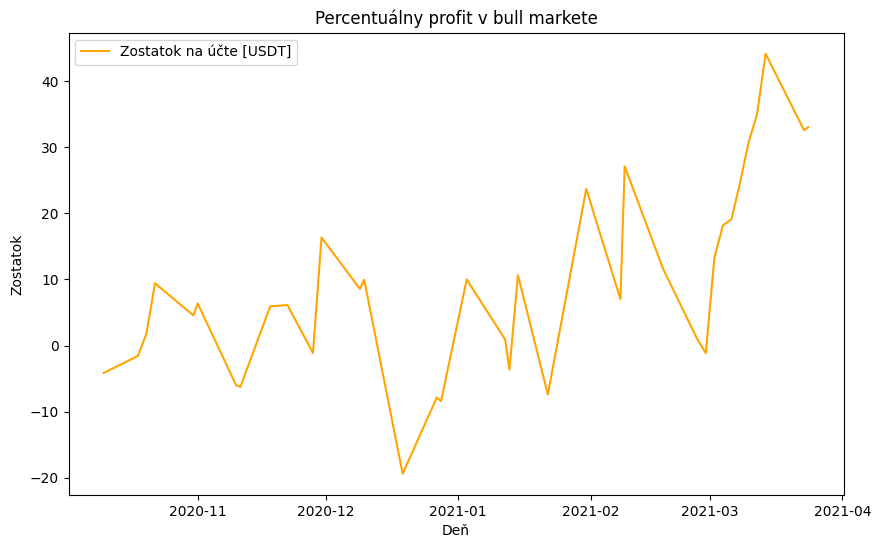

In [54]:
df_asc_filtered = df_asc_bot_2[df_asc_bot_2['Profit to Initial Balance'] != 0]
plt.figure(figsize=(10, 6))
plt.plot(pd.to_datetime(df_asc_filtered['Date']), df_asc_filtered['Profit to Initial Balance'], color='orange')
plt.legend(['Zostatok na účte [USDT]'])
plt.xlabel('Deň')
plt.ylabel('Zostatok')
plt.title('Percentuálny profit v bull markete')
plt.show()

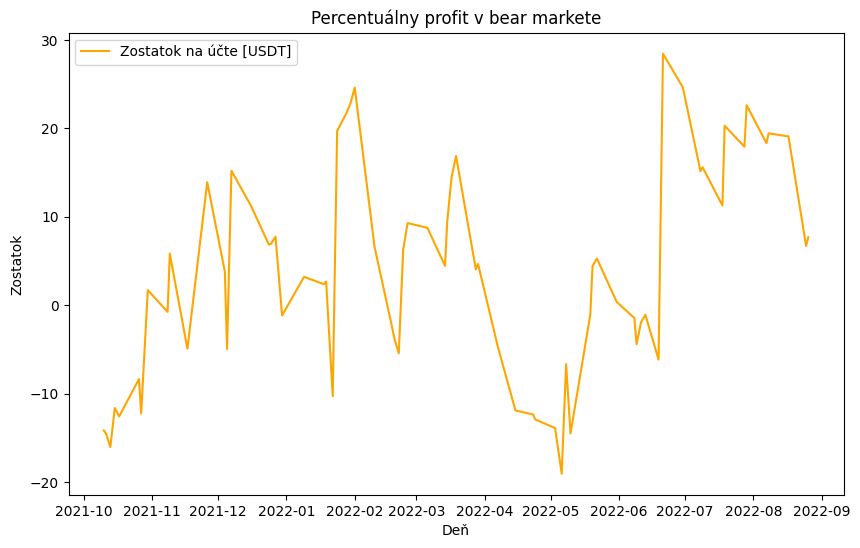

In [55]:
df_dsc_filtered = df_dsc_bot_2[df_dsc_bot_2['Profit to Initial Balance'] != 0]
plt.figure(figsize=(10, 6))
plt.plot(pd.to_datetime(df_dsc_filtered['Date']), df_dsc_filtered['Profit to Initial Balance'], color='orange')
plt.legend(['Zostatok na účte [USDT]'])
plt.xlabel('Deň')
plt.ylabel('Zostatok')
plt.title('Percentuálny profit v bear markete')
plt.show()

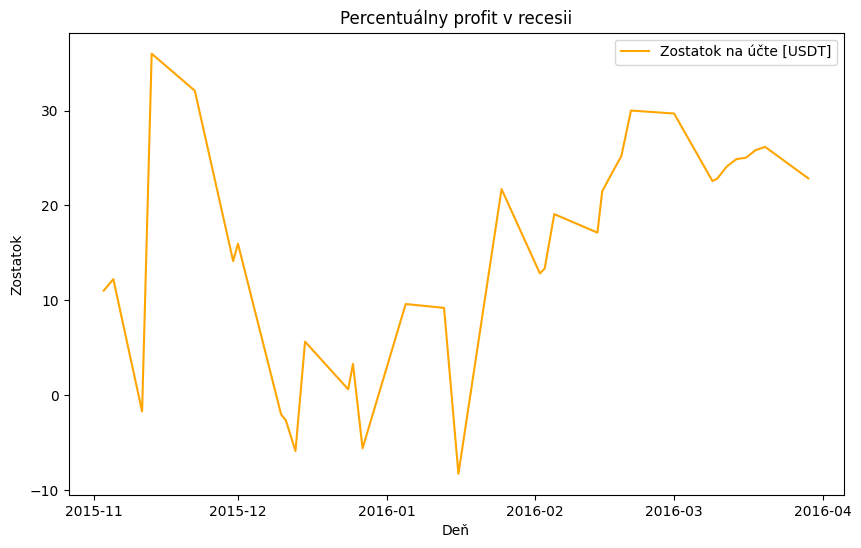

In [56]:
df_stg_filtered = df_stg_bot_2[df_stg_bot_2['Profit to Initial Balance'] != 0]
plt.figure(figsize=(10, 6))
plt.plot(pd.to_datetime(df_stg_filtered['Date']), df_stg_filtered['Profit to Initial Balance'], color='orange')
plt.legend(['Zostatok na účte [USDT]'])
plt.xlabel('Deň')
plt.ylabel('Zostatok')
plt.title('Percentuálny profit v recesii')
plt.show()

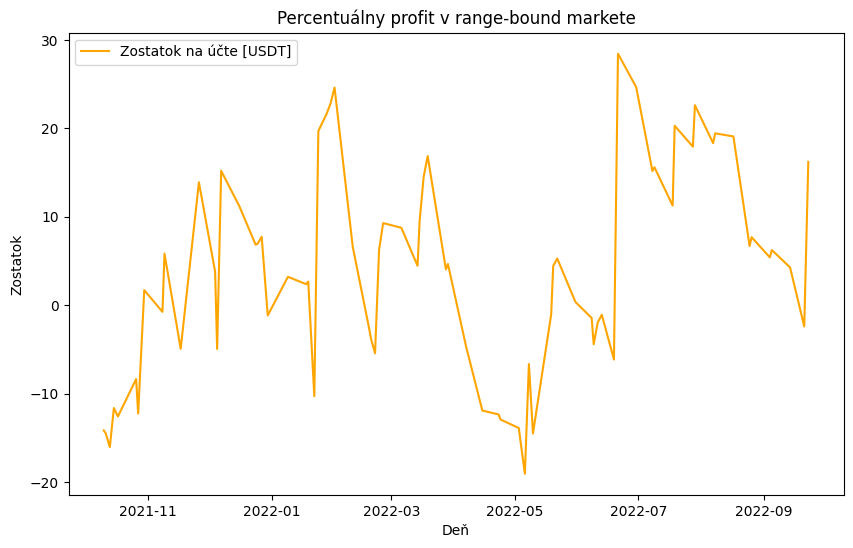

In [57]:
df_com_filtered = df_com_bot_2[df_com_bot_2['Profit to Initial Balance'] != 0]
plt.figure(figsize=(10, 6))
plt.plot(pd.to_datetime(df_com_filtered['Date']), df_com_filtered['Profit to Initial Balance'], color='orange')
plt.legend(['Zostatok na účte [USDT]'])
plt.xlabel('Deň')
plt.ylabel('Zostatok')
plt.title('Percentuálny profit v range-bound markete')
plt.show()

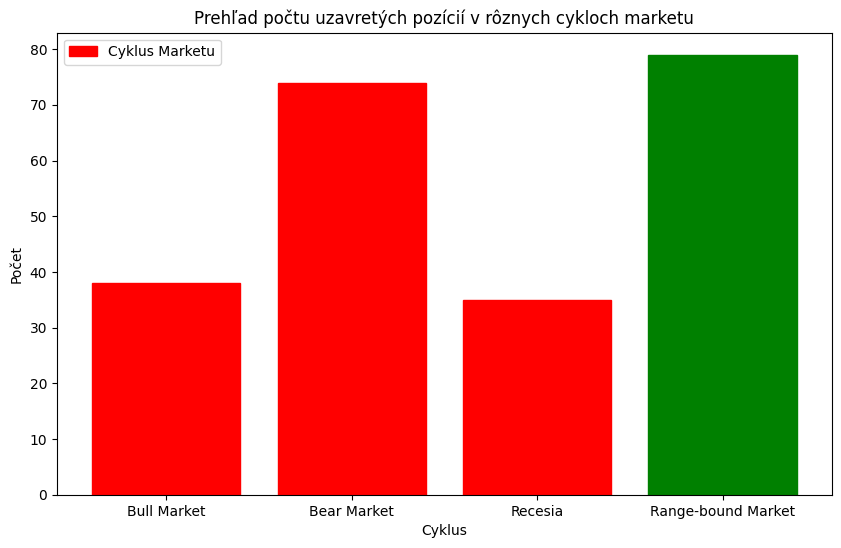

In [58]:
x_pos = ['Bull Market', 'Bear Market', 'Recesia', 'Range-bound Market']
y_pos = [len(df_asc_filtered), len(df_dsc_filtered), len(df_stg_filtered), len(df_com_filtered)]
plt.figure(figsize=(10, 6))
max_count_index = y_pos.index(max(y_pos))
colors = ['red' if i != max_count_index else 'green' for i in range(len(x_pos))]

bars = plt.bar(x_pos,y_pos)

for i, bar in enumerate(bars):
    bar.set_color(colors[i])

plt.legend(['Cyklus Marketu'])
plt.title('Prehľad počtu uzavretých pozícií v rôznych cykloch marketu')
plt.xlabel('Cyklus')
plt.ylabel('Počet')

plt.show()